<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [116]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [117]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [118]:
data.shape

(506, 14)

Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное - **нет, но есть распределение похожее на распределение Стьюдента (показатель RM)**
2.   Равномерное - **нет, в выборке нет равнораспределенных показателей**
3.   Биноминальное - **нет**
4.   Бернулли - **нет, в выборке нет показателей, принимающих значение 0-1**
5.   Геометрическое - **нет**
6.   Логнормальное - **распределение у показателей CRIM и DIS похожи на логнормальное распределение**



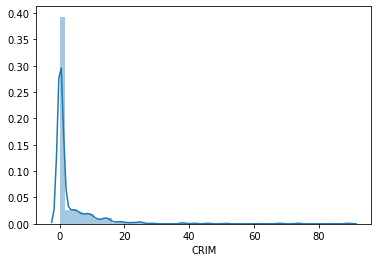

In [119]:
sns.distplot(data['CRIM'], 50)
plt.show()

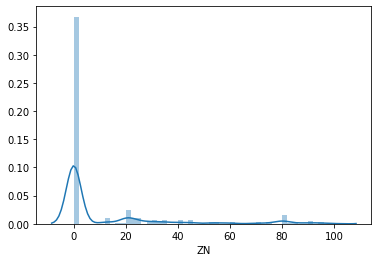

In [120]:
sns.distplot(data['ZN'], 50)
plt.show()

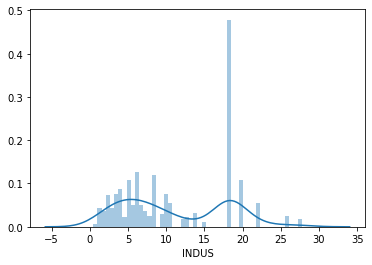

In [121]:
sns.distplot(data['INDUS'], 50)
plt.show()

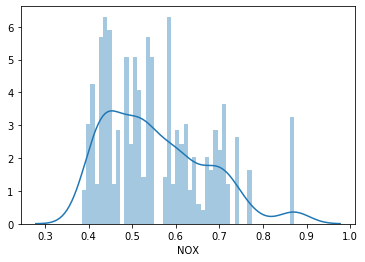

In [122]:
sns.distplot(data['NOX'], 50)
plt.show()

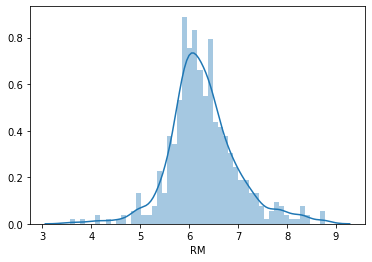

In [123]:
sns.distplot(data['RM'], 50)
plt.show()

In [124]:
rm = data['RM']

In [125]:
mean = statistics.mean(rm)
mean

6.284634387351779

In [126]:
sigma = statistics.pstdev(rm)
sigma

0.7019225143345689

In [127]:
count_ = rm[(rm>=mean-3*sigma) & (rm<=mean+3*sigma)].count()
print(count_/len(rm))

0.9841897233201581


In [128]:
count_ = rm[(rm>=mean-2*sigma) & (rm<=mean+2*sigma)].count()
print(count_/len(rm))

0.9367588932806324


In [129]:
count_ = rm[(rm>=mean-sigma) & (rm<=mean+sigma)].count()
print(count_/len(rm))

0.7727272727272727


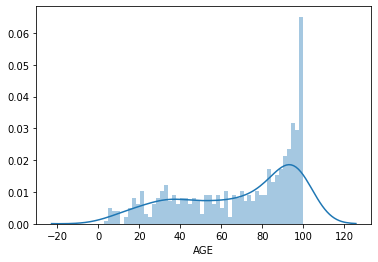

In [130]:
sns.distplot(data['AGE'], 50)
plt.show()

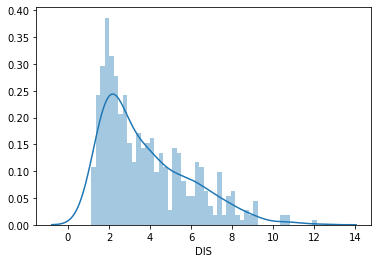

In [131]:
sns.distplot(data['DIS'], 50)
plt.show()

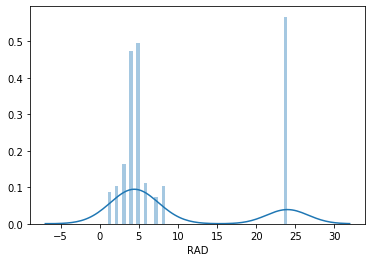

In [132]:
sns.distplot(data['RAD'], 50)
plt.show()

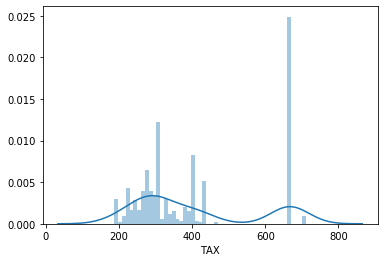

In [133]:
sns.distplot(data['TAX'], 50)
plt.show()

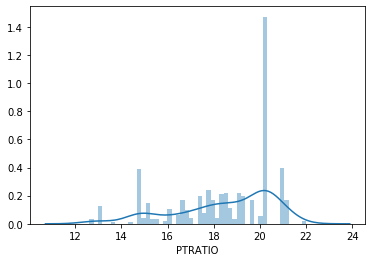

In [134]:
sns.distplot(data['PTRATIO'], 50)
plt.show()

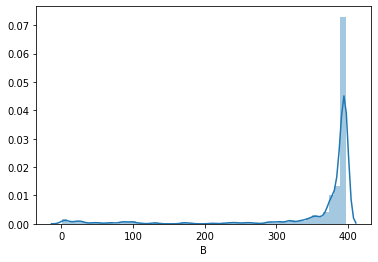

In [135]:
sns.distplot(data['B'], 50)
plt.show()

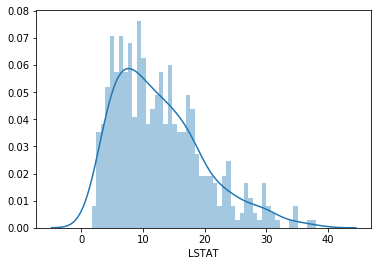

In [136]:
sns.distplot(data['LSTAT'], 50)
plt.show()

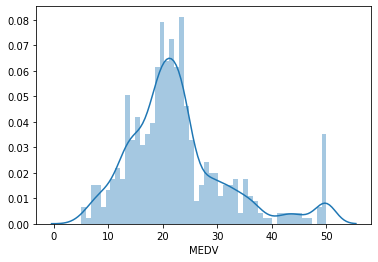

In [137]:
sns.distplot(data['MEDV'], 50)
plt.show()

Построить матрицу корреляций и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

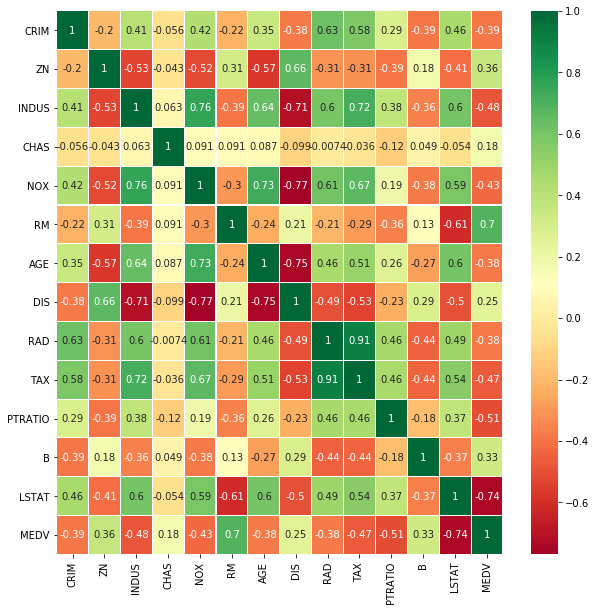

In [138]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



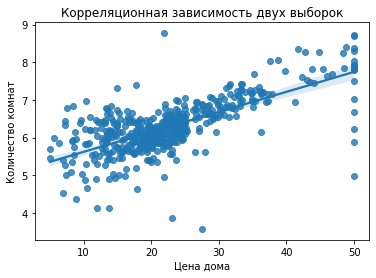

In [139]:
medv = data['MEDV']
rm = data['RM']
# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x=medv, y=rm, data=data, fit_reg=True)
plt.xlabel('Цена дома')
plt.ylabel('Количество комнат')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

In [140]:
medv = np.array(data['MEDV']).reshape(-1,1)
rm = np.array(data['RM']).reshape(-1,1)

In [147]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Делим данные на 80% тренировочных, 20% тестовых

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    medv,
    rm,
    test_size = 0.2
)

### Составляем модель линейной регрессии

In [149]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
predicted_y = model.predict(X_test)

### Считаем ошибку модели на тестовых данных

In [151]:
model.score(X_test, y_test)

0.5957165671148354

### Строим график линейной регресии

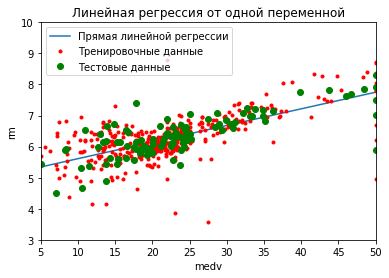

In [152]:
plt.xlabel('medv')
plt.ylabel('rm')
plt.title('Линейная регрессия от одной переменной')
x = np.linspace(5, 50, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(5,50)
plt.ylim(3,10)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [187]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [188]:
if df.isnull().values.any() == True:
    print('Есть отсутствующие значения')
else:
    print('Нет отсутствующих значений')

Есть отсутствующие значения


In [189]:
df = df.dropna()

Сколько стран в выборке? Написать ответ. 

In [192]:
len(list(df['Country (region)'].unique()))

140

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

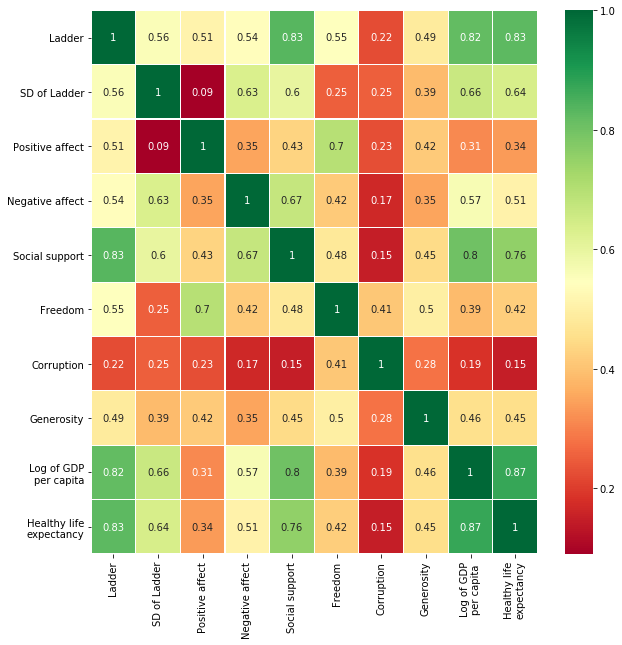

In [193]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

Можно сделать выводы, что довольно много показателей коррелируют между собой. Но, например, уровень коррупции слабо зависит от других показателей.

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

In [195]:
import random

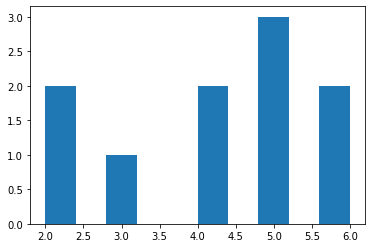

In [334]:
a = {}
b = []
for x in range(1,11):
    b.append(random.randint(1, 6))
a['attempt'] = b
df_cube = pd.DataFrame(a)
plt.hist(df_cube['attempt'], 10)
plt.show()

**Распределение получается рандомным, при каждом запуске строки по-разному чертится график.**

моделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

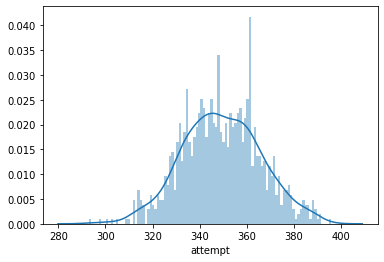

In [353]:
a = {}
b = []
for x in range(1,1001):
    c = []
    for y in range(1,101):
        c.append(random.randint(1, 6))
    b.append(sum(c))
a['attempt'] = b
df_cube = pd.DataFrame(a)
sns.distplot(df_cube['attempt'], 100)
plt.show()

**График изменился как раз из-за свойств ЦПТ. Мы сложили достаточно большое количество слабозависящих случайных величин и при их анализе получили распределение близкое к нормальному**